In [1]:
## import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('weight-height.csv')
data.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [3]:
## checking the quality of data

data.isnull().sum()

Height    0
Weight    0
dtype: int64

Text(0, 0.5, 'Height')

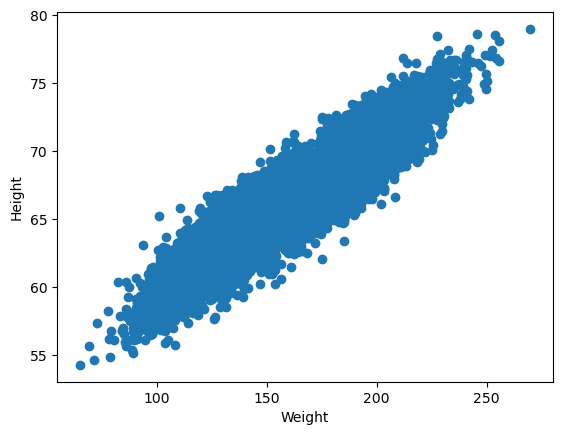

In [4]:
## scatter plot to check the relationship between the two variables

plt.scatter(data['Weight'], data['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [6]:
## seaborn for visualization
import seaborn as sns

/Users/yashpatel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


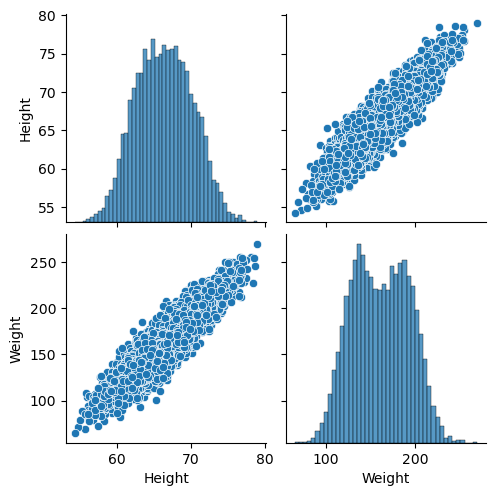

In [7]:
sns.pairplot(data)

In [8]:
## independent feature and dependent feature

data.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [16]:
X = data[['Weight']] ## independent feature should be in dataframe or 2D array; hence data[['height']]
x_1D = data['Weight'] ## independent feature but not in 2D array

In [11]:
X.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [17]:
x_1D.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [14]:
np.array(X).shape ## its a 2D array or dataframe; should be the case for independent variables

(10000, 1)

In [18]:
np.array(x_1D).shape ## its not a dataframe; shouldn't be the case for indemependent variables

(10000,)

In [19]:
## dependent feature

y = data['Height']  ## dependent feature should be in 1D format for regression

In [20]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [21]:
y.shape

(10000,)

In [25]:
## train test split the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### random_state = 42 will make sure that every time we run this command or train the model it will take
### the data same way it took for the first time; hence it training will remain same and hence the accuracy
### of the model.

In [26]:
X_train.shape

(7000, 1)

## standardization

why we need standardization?

here we have two variables one is in Kg unit, the other one in cm unit.
The magnitude of these two variables are different. when we run our linear regression it will time to reach global minima (the best fit line) due to high value.

To tackle this we use standardization to all of the independent feature(s). not to output variable.


We use Z-score. with mean = 0 and std = 1


$ z = (x – μ) / σ $
 

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)

We do not use fit_transform for test data. we only use transform.

Why?

because we want to use the same mean and std that we used for test dataset, for the training dataset.

why don't we use the fit_transform?

if we use fit_transform for test dataset. the model might know about the test dataset. and we don't want that to happen. we need to check for the accuracy of the model when we feed the new data. Hence, only transform.

In [33]:
X_test = scaler.transform(X_test)

In [34]:
X_test

array([[ 0.377174  ],
       [ 1.06572153],
       [ 0.28665242],
       ...,
       [ 0.64448627],
       [-0.70764196],
       [ 0.96924295]])

In [36]:
## apply linear regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [40]:
## it is a 1D array and hence it is giving an error

lr.fit(x_1D,y)

ValueError: Expected 2D array, got 1D array instead:
array=[241.8935632 162.3104725 212.7408556 ... 128.4753188 163.8524613
 113.6491027].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
print('coefficent or slope:',lr.coef_)

coefficent or slope: [3.55313486]


In [43]:
lr.intercept_

66.32026277295999

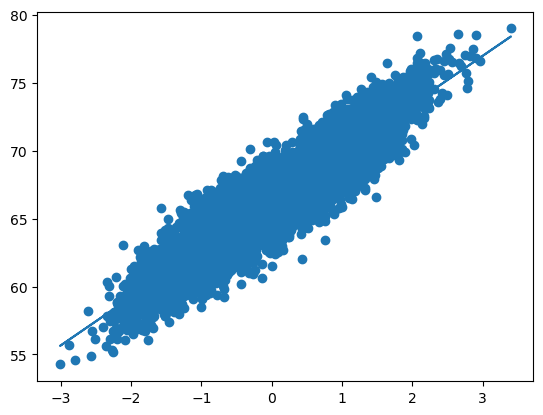

In [47]:
## plot best fit line with respect to training data

plt.scatter(X_train,y_train)
plt.plot(X_train, lr.predict(X_train))

## prediction of the test data

predicted height = intercept + coef(weight)


y_predct_test = 66.32 + 3.55(X_test)

In [49]:
## prediction wrt test data

y_predict = lr.predict(X_test)

In [50]:
## performance Metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [53]:
print('Mean_squared_error: ', mse)
print('Mean_absolute_error: ', mae)
print('Root_mean_squared_error: ', rmse)

Mean_squared_error:  2.1085956155543073
Mean_absolute_error:  1.1600795830404547
Root_mean_squared_error:  1.4521004151071328


## R square

In [54]:
from sklearn.metrics import r2_score

In [55]:
R2 = r2_score(y_test, y_predict)
R2

0.8577922082267299

In [57]:
## OLS linear regression

import statsmodels.api as sm

In [58]:
model = sm.OLS(y_train,X_train).fit()

In [59]:
prediction = model.predict(X_test)

In [60]:
prediction

array([ 1.34015009,  3.78665231,  1.0185147 , ...,  2.28994663,
       -2.51434731,  3.4438509 ])

In [62]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              20.08
Date:                Fri, 19 Jan 2024   Prob (F-statistic):                    7.55e-06
Time:                        11:08:25   Log-Likelihood:                         -39296.
No. Observations:                7000   AIC:                                  7.859e+04
Df Residuals:                    6999   BIC:                                  7.860e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [63]:
## prediction for new data

lr.predict([[72]])

array([322.14597304])

In [64]:
lr.predict(scaler.transform([[72]]))

/Users/yashpatel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([56.43944377])